# Análise exploratória dos dados das medições 

## Inicialização

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math

In [2]:
# Diretoria onde os dados estão localizados
dir_files = './03-dados-qualar-longo-corrigido/'

In [3]:
# Ficheiro das medições 
ficheiro_medicoes = dir_files + '03-medicoes-longo-AML.csv' # Possibilidade de u

In [4]:
medicoes = pd.read_csv(ficheiro_medicoes, thousands=',', index_col=0, parse_dates=True)

## Avaliar, para cada um dos poluentes, se a distribuição dos valores das medições varia ou não, entre estações.

In [5]:
# Projetar dataframe de forma a facilitar a visualização
medicoes

,Estação,variable,value
data,,,
2001-01-01 00:00:00,Alfragide/Amadora,SO2,2.9
2001-01-01 01:00:00,Alfragide/Amadora,SO2,2.9
2001-01-01 02:00:00,Alfragide/Amadora,SO2,5.6
2001-01-01 03:00:00,Alfragide/Amadora,SO2,5.6
2001-01-01 04:00:00,Alfragide/Amadora,SO2,5.6
...,...,...,...
2022-12-31 19:00:00,Paio Pires,PM2.5,8.8
2022-12-31 20:00:00,Paio Pires,PM2.5,10.5
2022-12-31 21:00:00,Paio Pires,PM2.5,9.1


In [6]:
# Criar lista de poluentes
lista_poluentes = medicoes['variable'].unique()
lista_poluentes

array(['SO2', 'PM10', 'O3', 'NO2', 'PM2.5'], dtype=object)

In [7]:
# Criar lista de estações
lista_estacoes = medicoes['Estação'].unique()
lista_estacoes

array(['Alfragide/Amadora', 'Alto Seixalinho', 'Alverca', 'Beato',
       'Benfica', 'Chelas', 'Entrecampos', 'Escavadeira', 'Fidalguinhos',
       'Laranjeiro', 'Lavradio', 'Loures-Centro', 'Mem Martins',
       'Olivais', 'Paio Pires', 'Quinta do Marquês', 'Reboleira',
       'Santa Cruz de Benfica', 'Avenida da Liberdade', 'Cascais-Mercado',
       'Cascais - Escola da Cidadela', 'Odivelas-Ramada', 'Restelo',
       'Câmara Municipal'], dtype=object)

In [8]:
# Função que devolve quaiquer duas estações nos dados
def duas_estacoes():
    return np.random.choice(lista_estacoes, size = 2, replace = False)

In [9]:
# Função que devolve 3 anos de medições de uma lista de anos disponíveis
def tres_anos(anos_disponiveis):
    tres = np.random.choice(anos_disponiveis, size=3, replace=False)
    tres.sort()
    return tres

In [10]:
# Listagem arbitrária de algumas cores, somente para facilitar a distinção dos gráficos
lista_cores = ['blue','red','green','orange','purple','cyan','magenta','yellow','brown','pink','olive']

In [11]:
# Função que devolve quaisquer número de cor pretendido
def diferentes_cores(numero_cores):
    return np.random.choice(lista_cores, size = numero_cores, replace = False)

In [12]:
### NOTA: Os seguintes comandos foram realizados com listas fixas, visto que usar uma função que devolva várias
### estações ou diferentes poluentes pode causar problemas, uma vez que nem todas as estações medem os vários poluentes,
### dito isto foram construídas funções de aletoriadade para testar as mesmas.

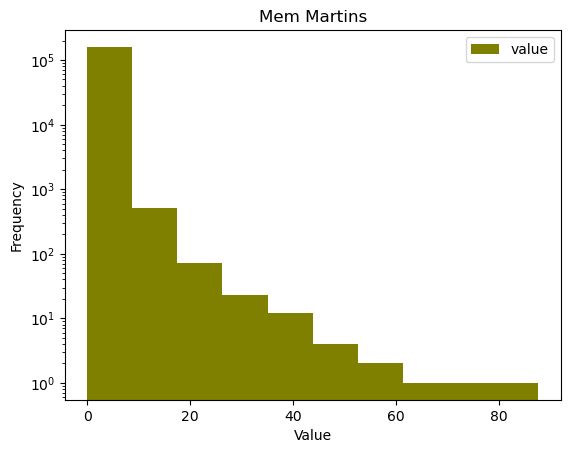

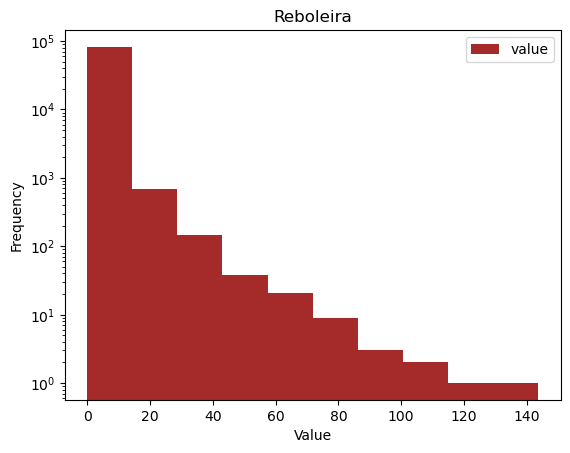

In [13]:
# KDE (ou histograma) dos valores das medições para um poluente, para comparar a distribuição das medições entre um subconjunto de estações
hist_data = medicoes.loc[medicoes['variable'] == 'SO2']
estacoes = ['Mem Martins','Reboleira']
cores = diferentes_cores(len(estacoes))

for estacao, cor in zip(estacoes, cores):
    hist = hist_data.loc[hist_data['Estação'] == estacao]
    # Histograma logarítmico
    hist.plot(kind = 'hist', column = 'value', log = True, xlabel = 'Value', title = estacao, color = cor)

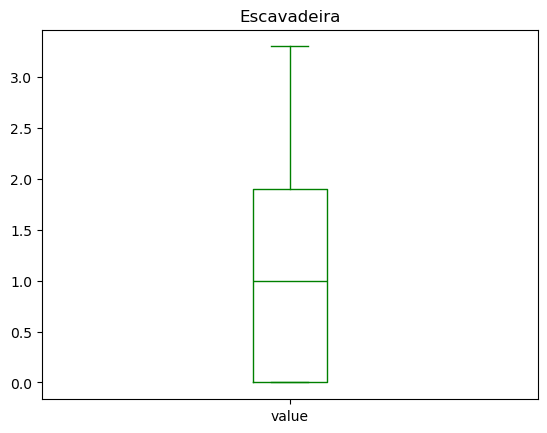

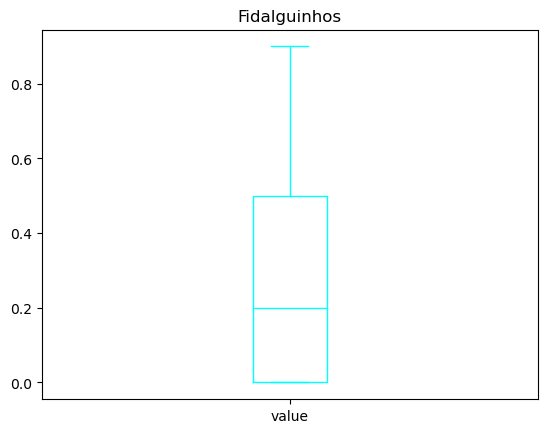

In [14]:
# Box Plot dos valores das medições para um poluente, para comparar a distribuição das medições entre um subconjunto de estações 
box_data = medicoes.loc[medicoes['variable'] == 'SO2']
estacoes = ['Escavadeira', 'Fidalguinhos']
cores = diferentes_cores(len(estacoes))

for estacao, cor in zip(estacoes, cores):
    box = box_data.loc[box_data['Estação']==estacao]
    # Limitar os dados ao valor de 3º Quartil, para eliminar as exceções
    ter_quartil = box['value'].quantile([0.75]).values[0]
    box = box.loc[box['value']<= (ter_quartil)]
    # BoxPlot
    box.plot(kind = 'box', column = 'value', title = estacao, color = cor)

## Avaliar, para cada um dos poluentes, se a distribuição dos valores das medições varia ou não, ao longo dos anos

In [15]:
# Função que calcula a década passando o ano
def calc_dec(Ano):
    decada = math.floor((Ano - math.floor(Ano/100)*100)/10)*10
    return decada

In [16]:
# Adicionar colunas com informação de ano e decada
medicoes['Ano'] = medicoes.index.year
medicoes['Década'] = medicoes['Ano'].apply(lambda x: calc_dec(x))

In [17]:
# Projetar dataframe de forma facilitar a visualização
medicoes

,Estação,variable,value,Ano,Década
data,,,,,
2001-01-01 00:00:00,Alfragide/Amadora,SO2,2.9,2001,0
2001-01-01 01:00:00,Alfragide/Amadora,SO2,2.9,2001,0
2001-01-01 02:00:00,Alfragide/Amadora,SO2,5.6,2001,0
2001-01-01 03:00:00,Alfragide/Amadora,SO2,5.6,2001,0
2001-01-01 04:00:00,Alfragide/Amadora,SO2,5.6,2001,0
...,...,...,...,...,...
2022-12-31 19:00:00,Paio Pires,PM2.5,8.8,2022,20
2022-12-31 20:00:00,Paio Pires,PM2.5,10.5,2022,20
2022-12-31 21:00:00,Paio Pires,PM2.5,9.1,2022,20


Estudo para a estação:
Alto Seixalinho

Anos estudados:
2008
2009
2010


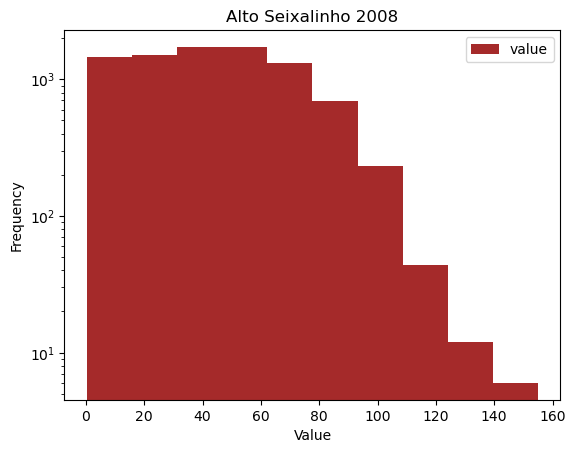

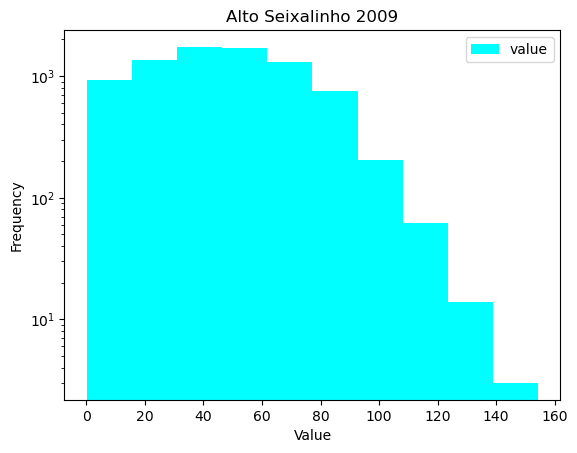

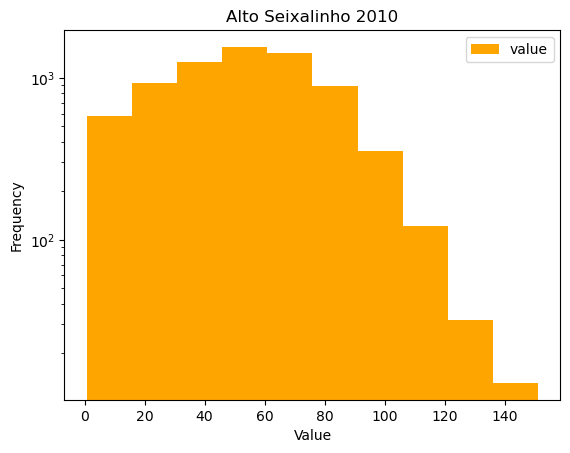

In [18]:
# KDE (ou histograma) dos valores das medições para um poluente, para comparar a distribuição das medições ao longo dos vários anos 
hist_data = medicoes.loc[medicoes['variable'] == 'O3']
estacao = 'Alto Seixalinho'
print('Estudo para a estação:')
print(estacao)
print()

hist_data = hist_data[hist_data['Estação'] == estacao]
anos = tres_anos(hist_data['Ano'].unique())
cores = diferentes_cores(len(anos))

print('Anos estudados:')
for ano, cor in zip(anos, cores):
    print(ano)
    titulo = estacao + ' ' + str(ano)
    hist = hist_data.loc[hist_data['Ano'] == ano]
    # Histograma logarítmico
    hist.plot(kind = 'hist', column = 'value', log = True, xlabel = 'Value', title = titulo, color = cor)

Estudo para a estação:
Alverca

Anos estudados:
2007
2010
2011


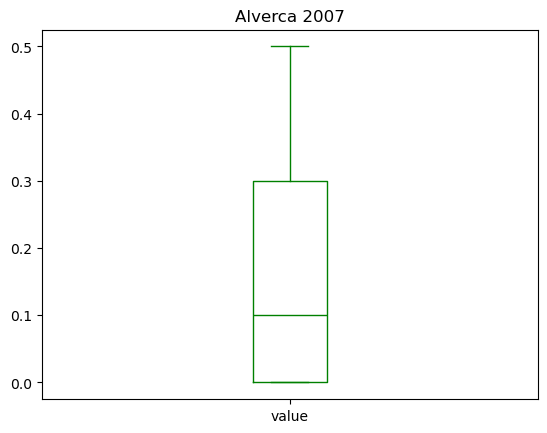

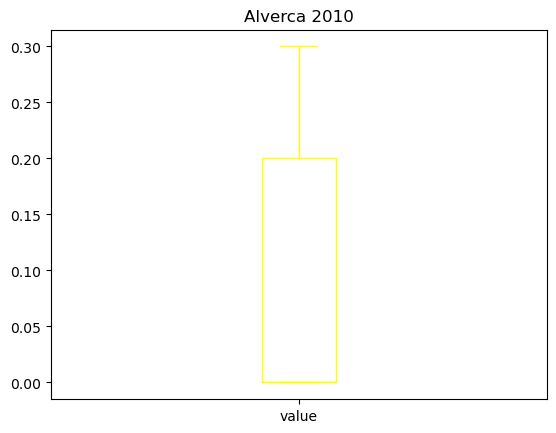

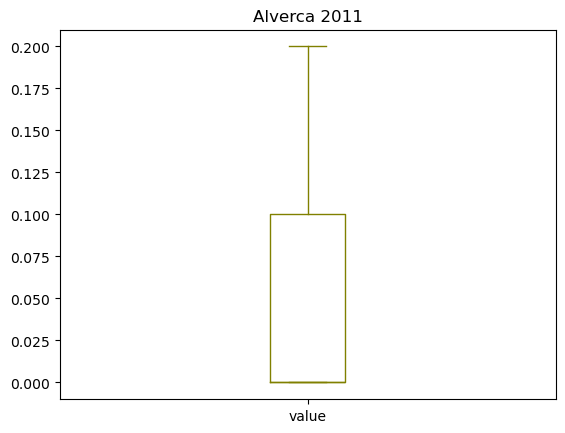

In [19]:
# Box Plot dos valores das medições para um poluente, para comparar a distribuição das medições ao longo dos vários anos
box_data = medicoes.loc[medicoes['variable'] == 'NO2']
estacao = 'Alverca'
print('Estudo para a estação:')
print(estacao)
print()

box_data = box_data.loc[box_data['Estação'] == estacao]
anos = tres_anos(hist_data['Ano'].unique())
cores = diferentes_cores(len(anos))

print('Anos estudados:')
for ano, cor in zip(anos, cores):
    print(ano)
    titulo = estacao + ' ' + str(ano)
    # Limitar os dados ao valor de 3º Quartil, para eliminar as exceções
    ter_quartil = box['value'].quantile([0.75]).values[0]
    box = box.loc[box['value']<= (ter_quartil)]
    # BoxPlot
    box.plot(kind = 'box', column='value', title = titulo, color = cor)

## Agora vamos analizar a evolução ao longo das décadas

In [20]:
# Projetar dataframe de forma facilitar a visualização
medicoes

,Estação,variable,value,Ano,Década
data,,,,,
2001-01-01 00:00:00,Alfragide/Amadora,SO2,2.9,2001,0
2001-01-01 01:00:00,Alfragide/Amadora,SO2,2.9,2001,0
2001-01-01 02:00:00,Alfragide/Amadora,SO2,5.6,2001,0
2001-01-01 03:00:00,Alfragide/Amadora,SO2,5.6,2001,0
2001-01-01 04:00:00,Alfragide/Amadora,SO2,5.6,2001,0
...,...,...,...,...,...
2022-12-31 19:00:00,Paio Pires,PM2.5,8.8,2022,20
2022-12-31 20:00:00,Paio Pires,PM2.5,10.5,2022,20
2022-12-31 21:00:00,Paio Pires,PM2.5,9.1,2022,20


In [21]:
# Lista de décadas
lista_decadas = medicoes['Década'].unique()
lista_decadas

array([ 0, 10, 20], dtype=int64)

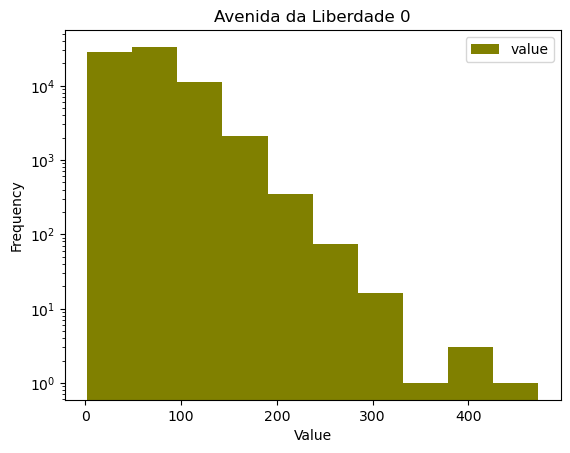

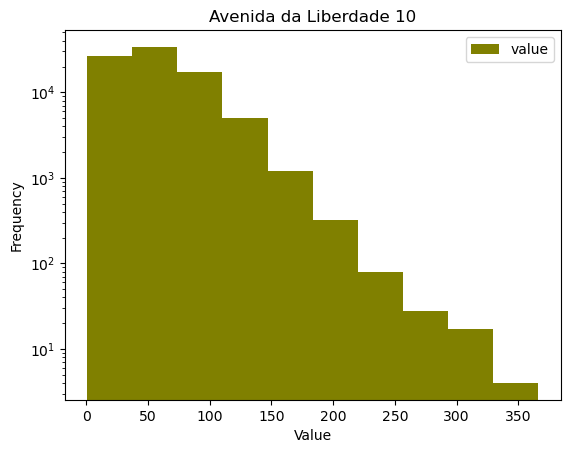

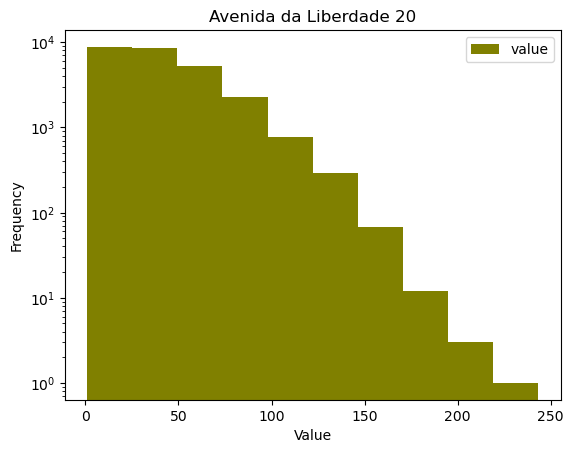

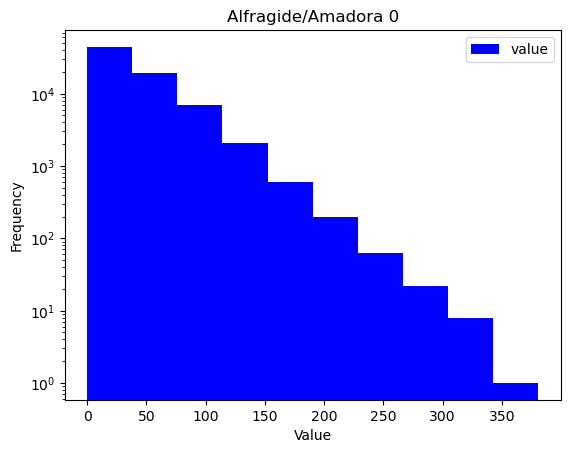

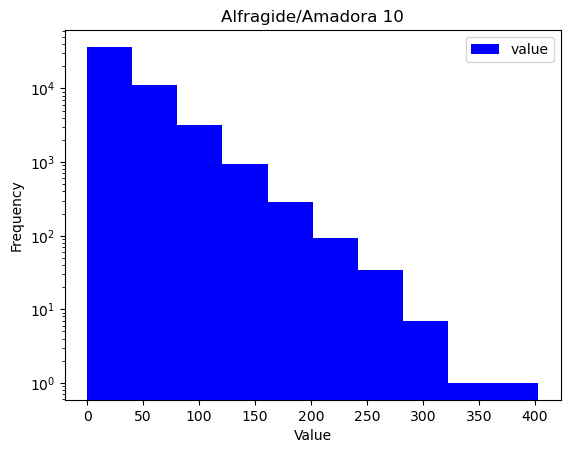

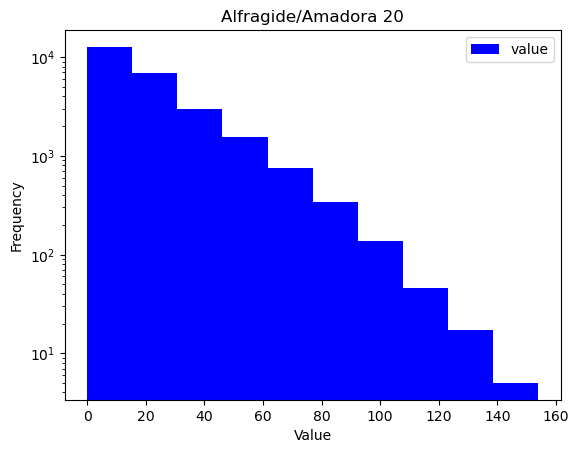

In [22]:
# KDE (ou histograma) dos valores das medições para um poluente, para comparar a distribuição das medições ao longo das várias decadas, num subconjunto de estações
hist_data = medicoes.loc[medicoes['variable'] == 'NO2']
estacoes = ['Avenida da Liberdade','Alfragide/Amadora']
cores = diferentes_cores(len(estacoes))

for estacao, cor in zip(estacoes, cores):
    for decada in lista_decadas:
        titulo = estacao + ' ' + str(decada)
        hist = hist_data[hist_data['Estação'] == estacao]
        hist = hist.loc[hist['Década'] == decada]
        # Histograma logarítmico
        hist.plot(kind = 'hist', column = 'value', log = True, xlabel = 'Value', title = titulo, color = cor)

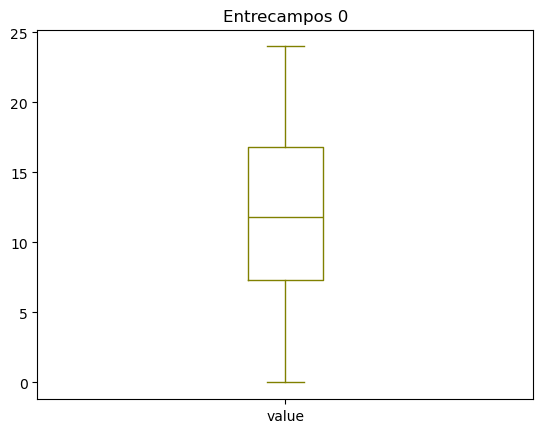

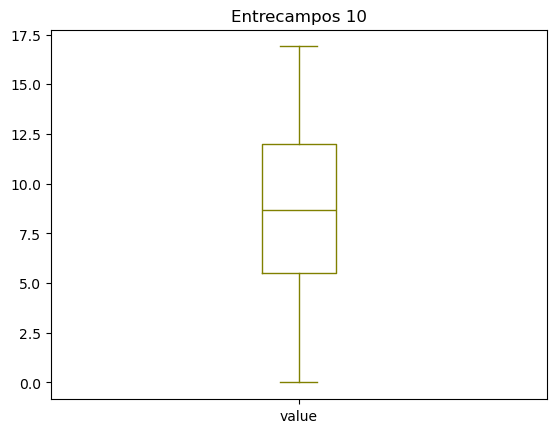

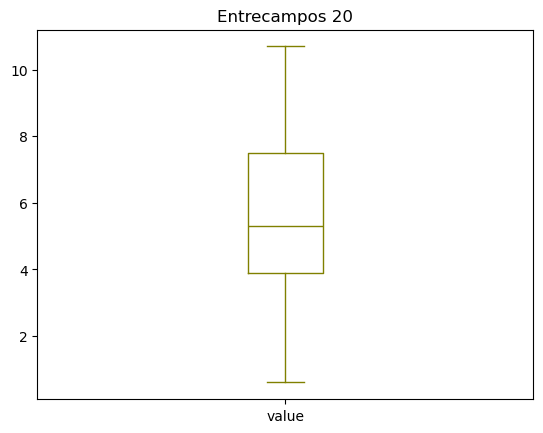

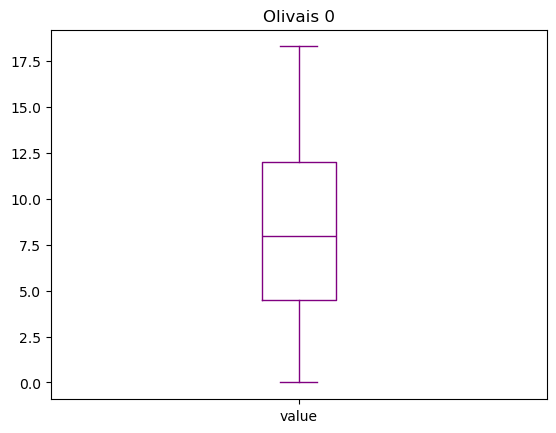

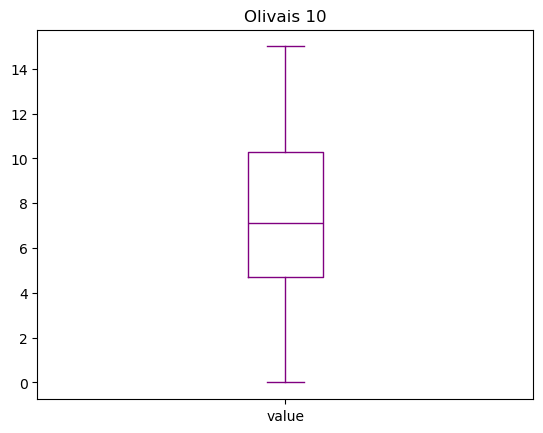

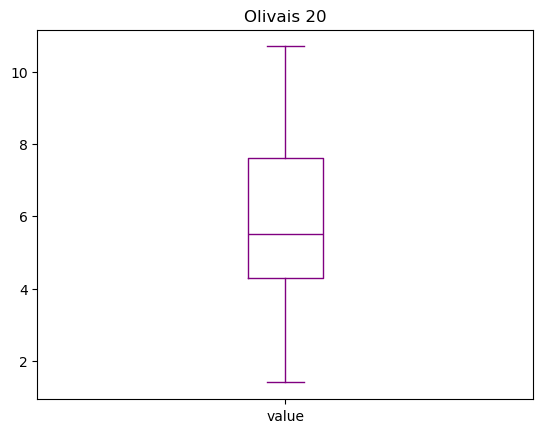

In [23]:
# Box Plot dos valores das medições para um poluente, para comparar a distribuição das medições ao longo das várias décadas, num subconjunto de estações
box_data = medicoes.loc[medicoes['variable'] == 'PM2.5']
estacoes = ['Entrecampos','Olivais']
cores = diferentes_cores(len(estacoes))

for estacao, cor in zip(estacoes,cores):
    for decada in lista_decadas:
        titulo = estacao + ' ' + str(decada)
        box = box_data.loc[box_data['Estação'] == estacao]
        box = box.loc[box['Década'] == decada]
        # Limitar os dados ao valor de 3º Quartil, para eliminar as exceções
        ter_quartil = box['value'].quantile([0.75]).values[0]
        box = box.loc[box['value'] <= (ter_quartil)]
        # BoxPlot
        box.plot(kind = 'box', column = 'value', title = titulo, color = cor)